<a href="https://colab.research.google.com/github/Eduardo757/MVP-PUCRIO/blob/main/MVP_PUCRIO_EDUARDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '08'> MVP de Analise de Dados e Boas Praticas

Eduardo Vasconcelos Sampaio


<font size = '6'> 1. Definição do Problema </font>

<br>
 O dataset usado nesse projeto foi o <b>VENDA EM VIDEO GAMES</b> . Todos os dados são exportados do site : http://www.vgchartz.com/gamedb/ , segundo o autor Gregor.

 Seu objetivo é entender tendencias globais do mercado nos ultimos anos em diferentes estilos de jogos e plataformas. Para mais detalhes sobre o dataset, consulte:  https://www.kaggle.com/datasets/gregorut/videogamesales/data

<br>

<b><font size ='4'>Informações sobre os atributos:</b> </font>

<br>

 **Rank** - Ranking das Vendas gerais

 **Name** - O nome do jogo

 **Platform** - Plataforma de lançamento do jogo (PC, PS4, xBox etc.)

 **Year** - Ano de lançamento do jogo

 **Genre** - Gênero do jogo
  
**Publisher** - Editora do jogo

**NA_Sales** - Vendas na América do Norte (em milhões)

**EU_Sales** - Vendas na Europa (em milhões)

**JP_Sales** -  Vendas no Japão (em milhões)

**Other_Sales** - Vendas no resto do mundo (em milhões)

**Global_Sales** - Total de vendas mundiais(em milhoes)





In [33]:


# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats



# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


<font size = '6'>2. Carga de Dados



Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.




In [34]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Eduardo757/MVP-PUCRIO/main/vgsales.csv"

# Informa o cabeçalho das colunas
colunas = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [35]:

dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<font size = '6'> 3. Análise de Dados </font>

<font size = '4'>3.1. Estatísticas Descritivas</font>

Examinaremos as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [36]:
# Mostra as dimensões do dataset
print(dataset.shape)

(16598, 11)


Portanto o dataset possui: 16598 linhas e 11 colunas

In [37]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Os campos float: NA_Sales, EU_Sales, JP_Sales,Other_Sales e  Global_Sales <br>
os campos do tipo objetos: name, platform, genre e publisher <br>
os campos do tipo inteiro: Rank

In [38]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Nesse trecho é possivel observar os 10 jogos mais vendidos no mundo em todos os tempos. O jogo wii Sports lidera a lista com 82.74 milhoes de vendas no mundo inteiro

In [39]:
# Mostra as 10 ultimas linhas do dataset
dataset.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


Neste trecho temos os 10 jogos menos vendidos da lista, ocupando as ultimas posições de vendas mundiais


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [40]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [41]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


A coluna Rank nao é interessante a gente perceber os resumos estatisticos visto que é só um campo incremental. Algumas informações mais relevantes:

 - Os países da america do norte possui media maior de venda, seguido da europa.
 - os dados sao analisados de jogos lançados de 1980 a 2020




A moda também nos traz algumas informações em alguns campos, vejamos a seguir:



In [42]:
dataset['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Os generos mais vendidos no mundo são ação seguido de Esportes...

E as plataformas que mais venderam no mundo ?

In [43]:
dataset['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<font size = '4'> 3.2. Visualizações Unimodais </font>

Vamos criar agora um histograma, para estes tipos de grafico iremos apenas analisar os campos YEAR, NA_SALES,EU_SALES,JP_SALES e Other_SALES

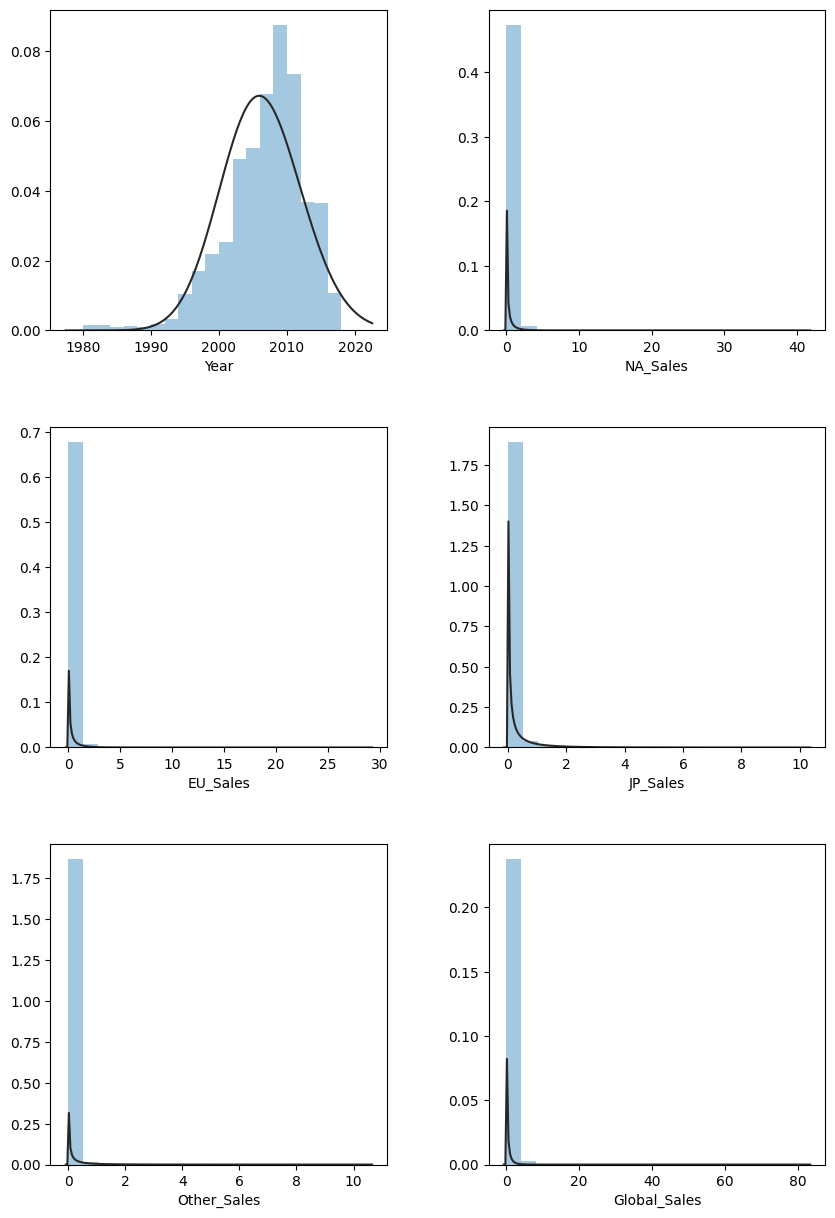

In [44]:
# Histograma
dataset.hist(figsize = (10,15))

sales_columns = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
  plt.subplot(3,2,i+1)
  sns.distplot(dataset[column], bins=20, kde=False, fit=stats.gamma)
plt.show()

Aqui ja podemos observar algumas tendencias. o Campo year ( ano de lançamento ) podemos observar que o grafico esta exponencial. Portanto os jogos possui tendencia a serem lançados no periodo de 2009 a 2010 aproximadamente...


O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

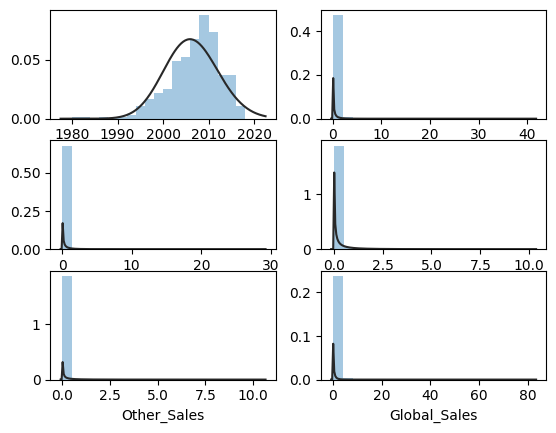

In [45]:
# Density Plot
sales_columns = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, column in enumerate(sales_columns):
  plt.subplot(3,2,i+1)
  sns.distplot(dataset[column], bins=20, kde=False, fit=stats.gamma)
plt.show()

Vamos agora trabalhar com boxplots.


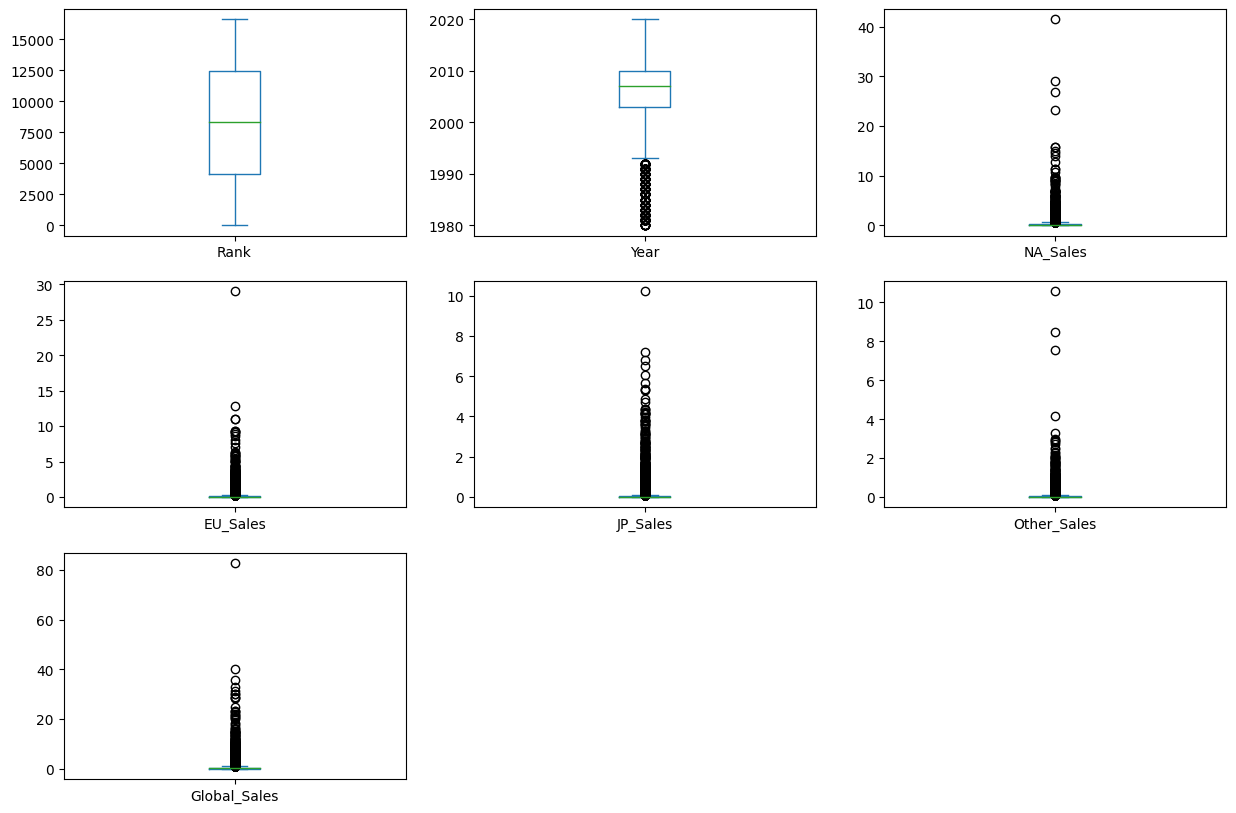

In [46]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A seguir iremos analisar outros graficos pertinentes e que aprendemos ao longo da Sprint. Neles são possivel analisar diversos outros casos como o grafico de barras :

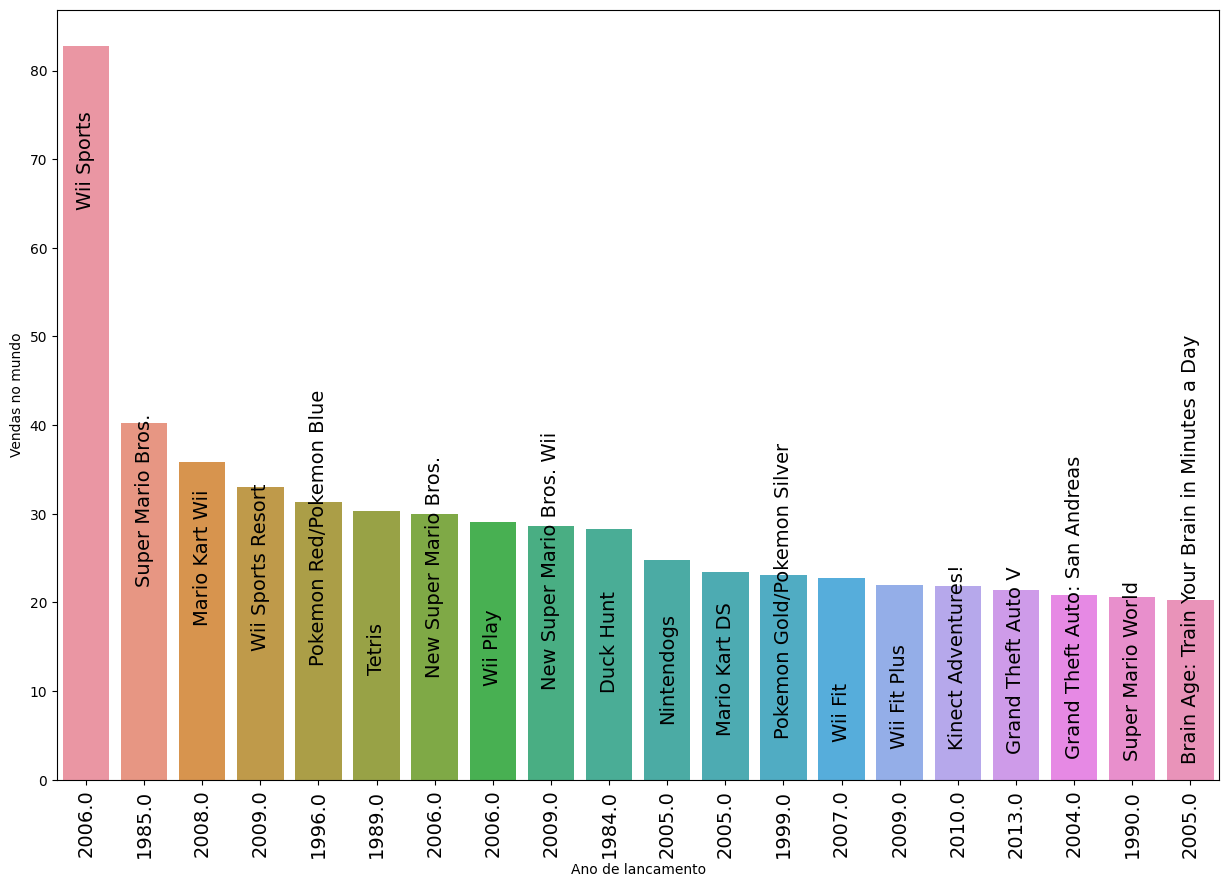

In [47]:
top_game_sale = dataset.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale


name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)


plt.figure(figsize=(15, 10))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Ano de lancamento')
plt.ylabel('Vendas no mundo')
plt.show()



Este grafico apresenta os 20 jogos mais vendidos no mundo na horizontal o ano de lancamento (coluna YEAR) e na vertical as Vendas Globais (campo Global_sales)

A seguir as editoras que mais venderam também podem ser analisadas


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

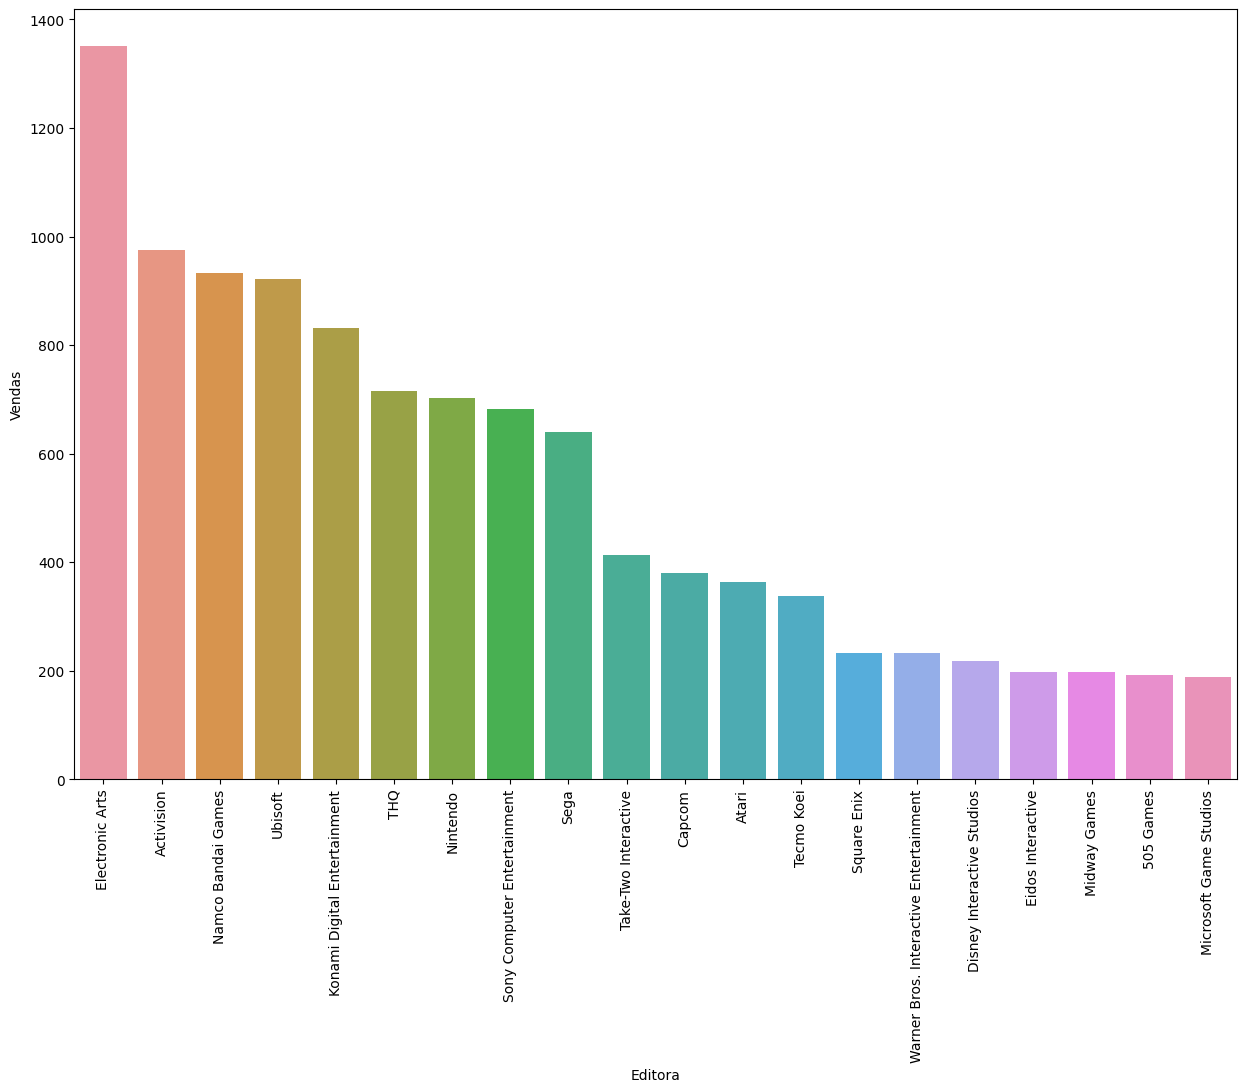

In [48]:
top_publisher = dataset.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

plt.figure(figsize=(15, 10))
sns.countplot( x="Publisher",data=dataset, order = dataset.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xlabel('Editora')
plt.ylabel('Vendas')
plt.xticks(rotation=90)

Usaremos agora um grafico de pizza para analisarmos as regioes que mais venderam jogos no mundo. Veja a seguir:

([<matplotlib.patches.Wedge at 0x781380eb9d50>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

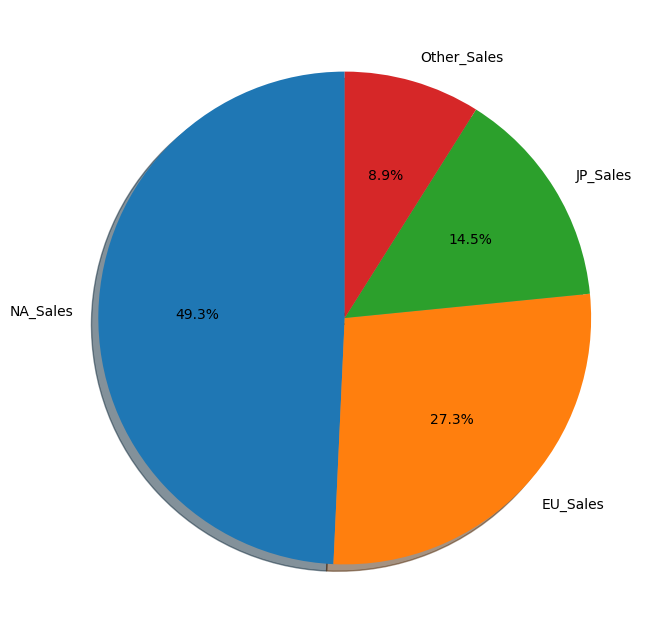

In [49]:
top_sale_reg = dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "regiao", 0: "vendas"})
top_sale_reg

labels = top_sale_reg['regiao']
sizes = top_sale_reg['vendas']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

America do norte compoe quase 50% das vendas

<font size = '4'>3.3. Visualizações Multimodais</font>

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

    Próximo de -1 : há uma correlação negativa entre as variáveis,
    Próximo de +1: há uma correlação positiva entre as variáveis.
    0: não há correlação entre as variáveis.

OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

<Axes: >

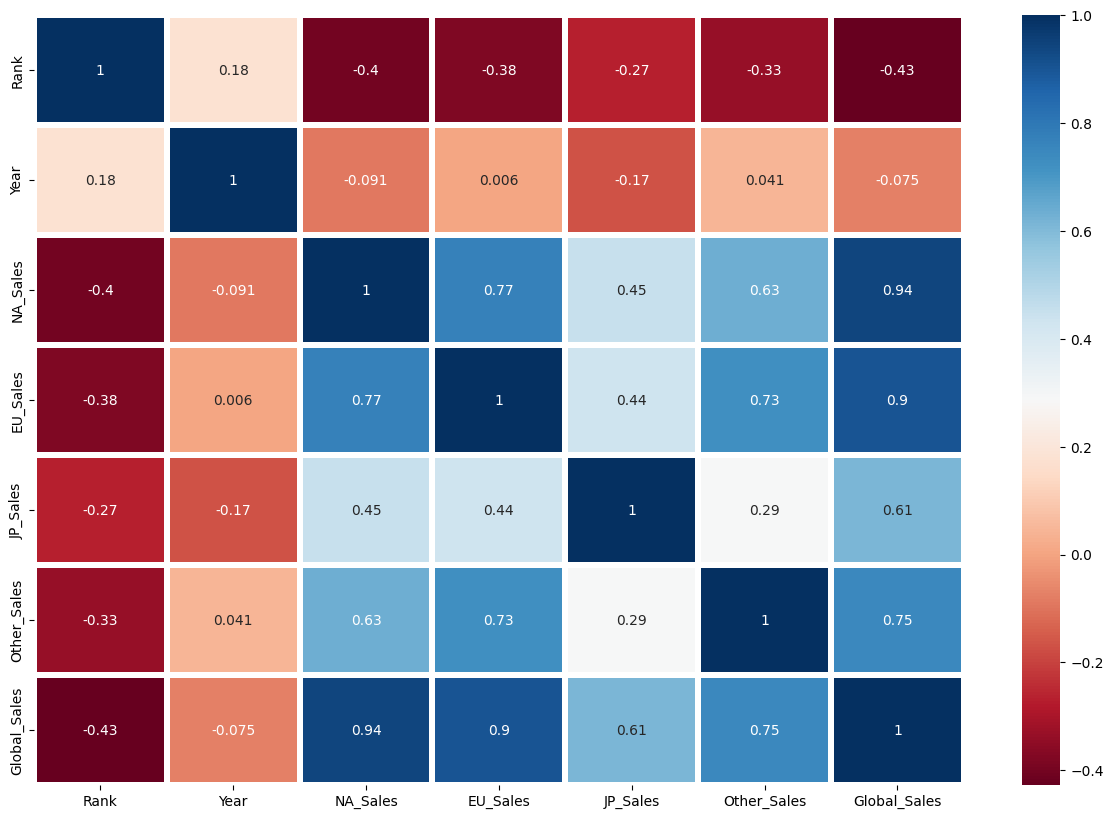

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap = "RdBu", annot=True, linewidth=3)

é possivel observar que a NA_SALES E EU_SALES tem muito efeito sobre o campo GLOBAL_SALES. Portanto, NA_SALES e EU_SALES se correlacionam para implicar no resultado do GLOBAL_SALES.

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis.

In [ ]:
# Scatter Plot com Seaborn - Variação 1

plt.figure(figsize=(15,10))
data_pair = dataset.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair


sns.pairplot(data_pair, hue='Genre')

<font size = '6' > 4. Pré-Processamento de dados </font>

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.
<br><br>

<font size = '4' > 4.1. Tratamento de Missings e Limpeza </font>





In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

Neste Dataset não temos muitos valores faltantes. Isso significa que não estamos perdendo muita informação. Este é um bom exemplo de um conjunto de dados prontos para serem analisados

Iremos agora tratar os dados da venda. No dataset possuiamos algumas vendas onde estao zeradas no grafico implicando em sujeira na informação para isso iremos realizar uma copia:


In [ ]:
data_hist_log = dataset.copy()

In [ ]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

In [ ]:
plt.figure(figsize=(15,10))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

Agora podemos ver sua assimetria e tendência central.

A seguir também iremos observar a matriz de nulidades do dataset

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
atributos = dataset[col[0:11]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Iremos agora substituir todos os valores nulos das colunas :  NA_SALES, EU_Sales, JP_sales, Other_Sales por 0

In [ ]:
# substituindo os NaN  por 0
atributos['NA_Sales'].fillna(0, inplace=True)
atributos['EU_Sales'].fillna(0, inplace=True)
atributos['JP_Sales'].fillna(0, inplace=True)
atributos['Other_Sales'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

A coluna Year iremos colocar a informação : "Ano desconhecido"
e na coluna Publisher iremos colocar a informação: "Desconhecido"

In [ ]:
atributos['Year'].fillna('Ano desconhecido', inplace=True)
atributos['Publisher'].fillna('Desconhecido', inplace=True)
# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Pronto, dados tratados 👌

<font size = '6' > Conclusão </font>

Neste MVP foi possível visualizar de forma dinamica e pratica como os dados sao valiosos para se entender diversas informações. Atraves de conceitos e tecnicas de varios campos de pesquisa como estatistica, visualização da informação e ate programação, é possivel obter novos conhecimentos sobre determinado assunto. O uso do pacote Panda é muito completo quando se trata dados

Iniciamos esse Notebook com uma visão geral dos dados, identificando as principais características do dataset 'videogames sales', tais como plataformas, gêneros e regiões de venda. Utilizando gráficos de pizza, pudemos visualizar a distribuição percentual das vendas entre as diferentes plataformas, proporcionando insights valiosos sobre a popularidade relativa de cada uma.

A utilização de histogramas permitiu-nos explorar as distribuições de vendas globais, oferecendo uma compreensão mais aprofundada das faixas de vendas mais comuns. Essa análise revelou padrões interessantes sobre os jogos que dominam o mercado e destacou a diversidade de preferências dos consumidores.

Concluo também que a indústria de videogames é dinâmica e em constante evolução. Plataformas emergentes, gêneros inovadores e mudanças nas preferências do consumidor desempenham um papel fundamental na moldagem do cenário atual. A compreensão dessas tendências é crucial para desenvolvedores, distribuidores e entusiastas da indústria que buscam prosperar em um ambiente competitivo.

Em última análise, a análise de dados proporciona uma lente valiosa para entender os videogames como um fenômeno cultural e econômico. Ao continuar a explorar e refinar nossas técnicas analíticas, podemos continuar a desvendar os mistérios por trás das preferências dos jogadores e antecipar as futuras tendências dessa indústria vibrante.